## Final Project: Finding a Quiet and Safe Place to Live

### By Billy Cole

My project is the columination of my need to find a quiet residential neighborhood in NYC. Which happens to be a very difficult feat. I will also compare the safest neighbour hoods by taking in the entire year of crime statistics. Incorperating the 311 data that is open to all from [Open Data](https://opendata.cityofnewyork.us/).

I tried to use the entire year with from the 311 database, the file ended up being massive **(1+ gigs)** so I instead utilized the April of 2017 and April of 2016. The crime data was a much more managable 28mb for the entire year of crime statstics 2016-2017.

I had tried to use the API, kept on getting server errors. So instead I used two relational databases.

In [2]:
import numpy as np
import pandas as pd
import datetime
import json
import urllib.request
import seaborn as sns
from collections import OrderedDict
from sklearn.linear_model import LinearRegression
from pandas.io.json import json_normalize
from matplotlib import pyplot as plt
%matplotlib inline

##### Relational Data Base - 311:

In [3]:
noise417 = pd.read_csv('https://raw.githubusercontent.com/WilliamJCole/IS362_Final_Project/master/Files/Noise_Complaints_April_2017.csv',sep=',')
noise417

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location
0,35835573,4/1/17 0:01,4/1/17 0:28,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10467.0,07 BRONX,BRONX,1018412.0,259598.0,40.879145,-73.876464,"(40.879144669133176, -73.87646438522717)"
1,35838142,4/1/17 0:04,4/1/17 0:12,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,10455.0,01 BRONX,BRONX,1010131.0,236205.0,40.814966,-73.906500,"(40.81496598157052, -73.90650015950133)"
2,35833590,4/1/17 0:05,4/1/17 9:37,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11101.0,02 QUEENS,QUEENS,995645.0,210208.0,40.743642,-73.958878,"(40.74364166035955, -73.95887755839249)"
3,35834330,4/1/17 0:05,4/1/17 8:49,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11226.0,14 BROOKLYN,BROOKLYN,995665.0,175149.0,40.647413,-73.958865,"(40.64741283883138, -73.9588647959135)"
4,35838814,4/1/17 0:05,4/1/17 4:55,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10003.0,06 MANHATTAN,MANHATTAN,989682.0,206744.0,40.734140,-73.980400,"(40.73413951274722, -73.98039971548371)"
5,35838072,4/1/17 0:06,4/1/17 1:26,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,10036.0,05 MANHATTAN,MANHATTAN,988150.0,216378.0,40.760583,-73.985922,"(40.76058322950115, -73.98592204392392)"
6,35844431,4/1/17 0:07,4/4/17 22:03,DEP,Department of Environmental Protection,Noise,Noise: air condition/ventilation equipment (NV1),NaN,10452.0,04 BRONX,BRONX,1003936.0,242233.0,40.831527,-73.928863,"(40.8315271048226, -73.92886303221528)"
7,35838767,4/1/17 0:07,4/1/17 9:33,NYPD,New York City Police Department,Noise - Residential,Banging/Pounding,Residential Building/House,11374.0,06 QUEENS,QUEENS,1024435.0,203462.0,40.725042,-73.855020,"(40.72504161746349, -73.85502020259588)"
8,35833644,4/1/17 0:07,4/1/17 3:47,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11224.0,13 BROOKLYN,BROOKLYN,989317.0,149885.0,40.578074,-73.981759,"(40.5780742789993, -73.98175946661651)"
9,35835078,4/1/17 0:07,4/1/17 1:38,NYPD,New York City Police Department,Noise - Commercial,Banging/Pounding,Store/Commercial,10128.0,08 MANHATTAN,MANHATTAN,997105.0,224266.0,40.782225,-73.953582,"(40.78222524276318, -73.95358180659666)"


In [4]:
noise416 = pd.read_csv('https://raw.githubusercontent.com/WilliamJCole/IS362_Final_Project/master/Files/Noise_Complaints_April_2016.csv',sep=',')
noise416

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location
0,33029766,4/1/16 0:00,4/1/16 3:16,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10013.0,02 MANHATTAN,MANHATTAN,984789.0,201439.0,40.719580,-73.998056,"(40.719580230801505, -73.99805555128263)"
1,33027503,4/1/16 0:00,4/1/16 3:22,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11419.0,09 QUEENS,QUEENS,1033416.0,190890.0,40.690489,-73.822710,"(40.69048916332186, -73.82271035152993)"
2,33032781,4/1/16 0:00,4/1/16 0:58,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10472.0,09 BRONX,BRONX,1021321.0,241894.0,40.830541,-73.866043,"(40.830540787241496, -73.86604286404084)"
3,33030527,4/1/16 0:01,4/1/16 0:41,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Music,Street/Sidewalk,11213.0,08 BROOKLYN,BROOKLYN,1001866.0,183639.0,40.670706,-73.936497,"(40.67070585152127, -73.93649663946313)"
4,33028792,4/1/16 0:01,4/1/16 8:01,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10463.0,08 BRONX,BRONX,1012064.0,259197.0,40.878066,-73.899421,"(40.878066337687855, -73.89942147771544)"
5,33031834,4/1/16 0:01,4/1/16 2:00,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11216.0,03 BROOKLYN,BROOKLYN,998318.0,190433.0,40.689360,-73.949273,"(40.68936018629767, -73.94927252609706)"
6,33032642,4/1/16 0:02,4/1/16 5:18,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10301.0,01 STATEN ISLAND,STATEN ISLAND,960931.0,174345.0,40.645183,-74.084030,"(40.64518268959385, -74.08402977438229)"
7,33031760,4/1/16 0:03,4/1/16 7:53,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10031.0,09 MANHATTAN,MANHATTAN,998476.0,240092.0,40.825661,-73.948598,"(40.82566115523861, -73.9485977223673)"
8,33025590,4/1/16 0:03,4/1/16 1:48,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11355.0,07 QUEENS,QUEENS,1031634.0,211584.0,40.747299,-73.828990,"(40.74729882640561, -73.82899044260391)"
9,33029708,4/1/16 0:04,4/1/16 2:59,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10019.0,04 MANHATTAN,MANHATTAN,986141.0,218081.0,40.765258,-73.993174,"(40.76525818394538, -73.99317351705729)"


##### Crime:

In [5]:
crime2016 = pd.read_csv('https://raw.githubusercontent.com/WilliamJCole/IS362_Final_Project/master/Files/NYPD_Complaint_Data_2016.csv',sep=',')
crime2016 = crime2016.rename(columns={'ADDR_PCT_CD': 'Precinct'})
crime2016

,CMPLNT_NUM,CMPLNT_FR_DT,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,Precinct,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,898636308,11/15/16,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",VIOLATION,MANHATTAN,28,998625.0,230177.0,40.798455,-73.948082,"(40.79845524, -73.948082015)"
1,923594521,11/15/16,CRIMINAL MISCHIEF & RELATED OF,"MISCHIEF,CRIMINAL, UNCL 2ND",FELONY,BRONX,40,1007034.0,236608.0,40.816089,-73.917689,"(40.816088874, -73.917688689)"
2,438361610,11/15/16,PETIT LARCENY,"LARCENY,PETIT FROM AUTO",MISDEMEANOR,BROOKLYN,88,993934.0,188677.0,40.684554,-73.965085,"(40.684554464, -73.965084645)"
3,586989382,11/15/16,GRAND LARCENY,"LARCENY,GRAND BY FALSE PROMISE-NOT IN PERSON C...",FELONY,QUEENS,105,1056264.0,205572.0,40.730639,-73.740167,"(40.730639403, -73.740166564)"
4,847841563,11/15/16,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",VIOLATION,BRONX,47,1024693.0,261681.0,40.884844,-73.853740,"(40.884843556, -73.85374009)"
5,926516733,11/15/16,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,MISDEMEANOR,MANHATTAN,33,1001184.0,246434.0,40.843072,-73.938798,"(40.843071579, -73.938798434)"
6,603982336,11/15/16,GRAND LARCENY,"LARCENY,GRAND FROM PERSON,PICK",FELONY,BRONX,47,1026480.0,262584.0,40.887314,-73.847272,"(40.887313634, -73.847271758)"
7,997144457,11/15/16,OFF. AGNST PUB ORD SENSBLTY &,AGGRAVATED HARASSMENT 2,MISDEMEANOR,BROOKLYN,66,988262.0,171679.0,40.637903,-73.985546,"(40.637903085, -73.985545819)"
8,918223352,11/15/16,ADMINISTRATIVE CODE,"ADM.CODE,UNCLASSIFIED MISDEMEA",MISDEMEANOR,QUEENS,115,1016768.0,212894.0,40.750970,-73.882637,"(40.750969834, -73.882637055)"
9,402684356,11/15/16,BURGLARY,"BURGLARY,COMMERCIAL,DAY",FELONY,MANHATTAN,33,999973.0,243933.0,40.836209,-73.943181,"(40.836209301, -73.943181103)"


In [6]:
crime2015 = pd.read_csv('https://raw.githubusercontent.com/WilliamJCole/IS362_Final_Project/master/Files/NYPD_Complaint_Data_2015.csv',sep=',')
crime2015 = crime2015.rename(columns={'ADDR_PCT_CD': 'Precinct'})
crime2015

,CMPLNT_NUM,CMPLNT_FR_DT,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,Precinct,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/15,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",FELONY,BRONX,44.0,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/15,MURDER & NON-NEGL. MANSLAUGHTER,NaN,FELONY,QUEENS,103.0,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/15,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE,INTENT TO",FELONY,MANHATTAN,28.0,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/15,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,QUEENS,105.0,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/15,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,MANHATTAN,13.0,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"
5,365661343,12/31/15,FELONY ASSAULT,"ASSAULT 2,1,UNCLASSIFIED",FELONY,BROOKLYN,71.0,996149.0,181562.0,40.665023,-73.957111,"(40.665022689, -73.957110763)"
6,608231454,12/31/15,DANGEROUS DRUGS,"CONTROLLED SUBSTANCE, POSSESSI",MISDEMEANOR,MANHATTAN,7.0,987373.0,201662.0,40.720200,-73.988735,"(40.720199996, -73.988735082)"
7,265023856,12/31/15,DANGEROUS WEAPONS,WEAPONS POSSESSION 1 & 2,FELONY,BRONX,46.0,1009041.0,247401.0,40.845707,-73.910398,"(40.845707148, -73.910398033)"
8,989238731,12/31/15,ASSAULT 3 & RELATED OFFENSES,ASSAULT 3,MISDEMEANOR,BRONX,48.0,1014154.0,251416.0,40.856711,-73.891900,"(40.856711291, -73.891899956)"
9,415095955,12/31/15,PETIT LARCENY,"LARCENY,PETIT FROM BUILDING,UN",MISDEMEANOR,MANHATTAN,19.0,994327.0,218211.0,40.765618,-73.963623,"(40.765617688, -73.96362342)"


### Cleaning Up the Data:

So after looking into some of the zip codes some of the reported zip was NaN. So let's clear that up. Also there is a random outlier on the 2015 data set for Crime.

In [8]:
noise417 = noise417.dropna(subset=['Incident Zip'])
noise416 = noise416.dropna(subset=['Incident Zip'])

### Analysis:

Lets find out the which zipcode has the most complaints, and merge the two years for comparison. Also I'll calculate the net change.

In [9]:
noiseByZip417 = noise417['Incident Zip'].value_counts()
noiseByZip417 = noiseByZip417.rename(columns={'Incident Zip': 'April 2016'})
noiseByZip416 = noise416['Incident Zip'].value_counts()
zipdiff = (noiseByZip417 - noiseByZip416)
noiseByZip = pd.concat([noiseByZip416, noiseByZip417, zipdiff], axis=1, join_axes=[noiseByZip416.index])
noiseByZip = noiseByZip.rename(columns={'Incident Zip': 'April 2016', 0 : 'April 2017', 1 : 'Net Change'})
noiseByZip = noiseByZip.fillna(0)
noiseByZip

,April 2016,April 2017,Net Change
10031.0,657,723.0,66.0
10034.0,650,543.0,-107.0
11226.0,632,662.0,30.0
10040.0,628,495.0,-133.0
11216.0,596,520.0,-76.0
10002.0,591,685.0,94.0
10009.0,568,500.0,-68.0
10001.0,545,269.0,-276.0
10027.0,542,478.0,-64.0
11211.0,534,443.0,-91.0


Let's visualize the information on a bar graph:

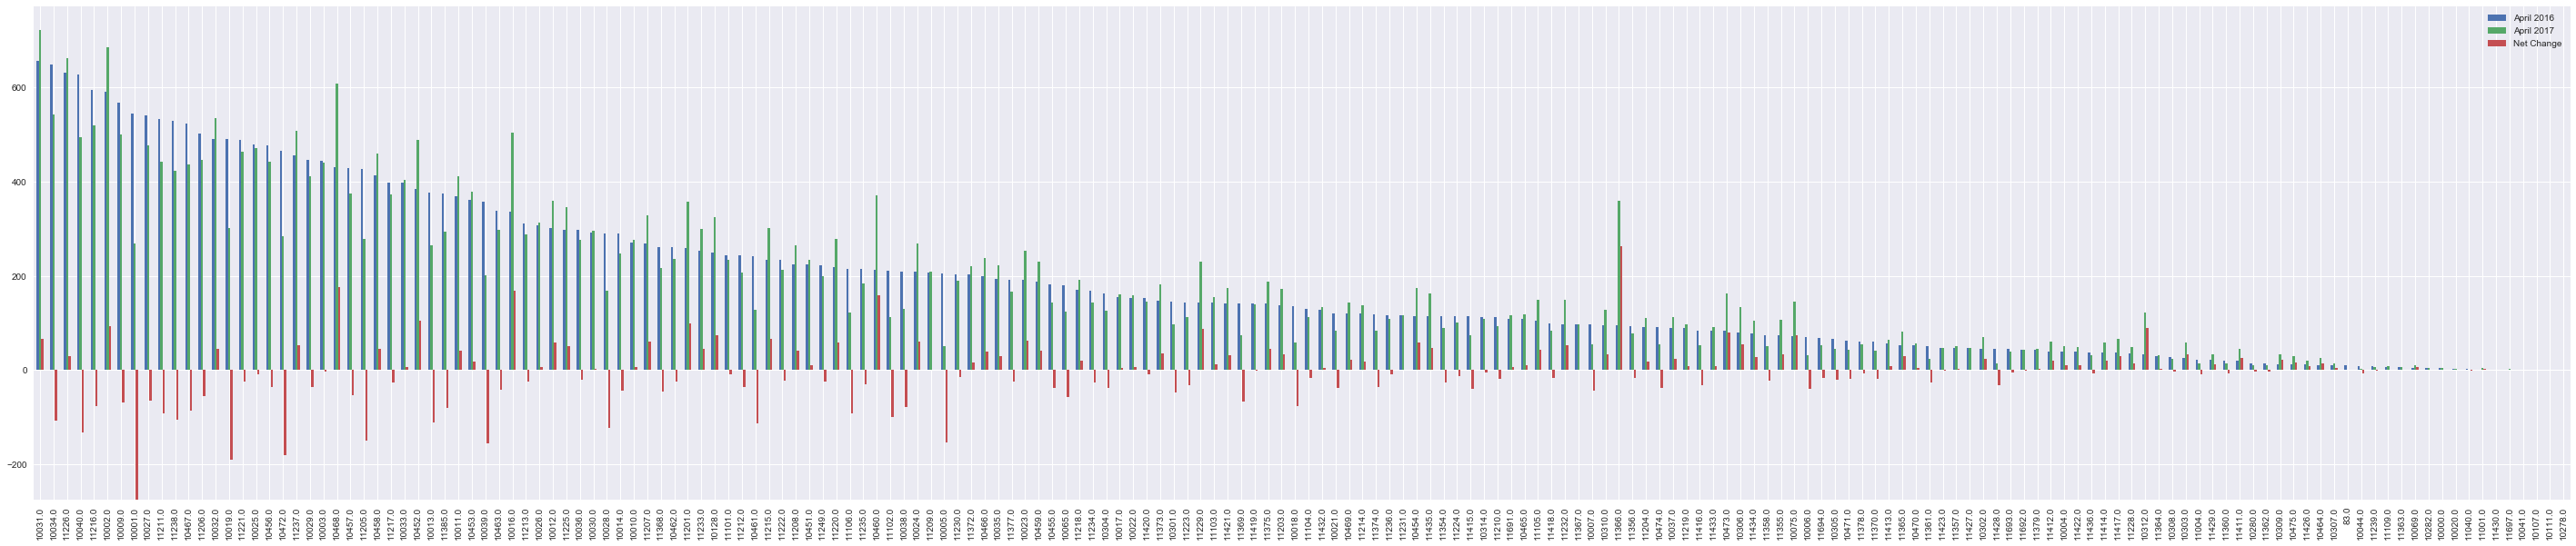

In [10]:
noiseByZip.plot.bar(fontsize=10,figsize= (50, 10))

The information is rather overwhelming in this form so lets narrow down to the top ten greatest drops of complaints over the last year.

In [11]:
noiseByZipDiff10 = noiseByZip.sort_values(by='Net Change', ascending=1)
noiseByZipDiff10 = noiseByZipDiff10.head(n=10)
noiseByZipDiff10

,April 2016,April 2017,Net Change
10001.0,545,269.0,-276.0
10019.0,491,301.0,-190.0
10472.0,466,285.0,-181.0
10039.0,358,202.0,-156.0
10005.0,205,51.0,-154.0
11205.0,427,278.0,-149.0
10040.0,628,495.0,-133.0
10028.0,291,168.0,-123.0
10461.0,241,128.0,-113.0
10013.0,378,266.0,-112.0


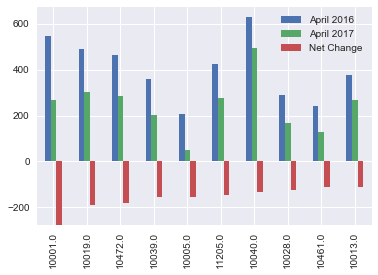

In [12]:
noiseByZipDiff10.plot.bar()

##### Crime Analysis Per Precinct:

Now lets utilize the precinct system and see which precincts have the most crimes.


In [13]:
crimebyPrecinct2016 = pd.crosstab(crime2016.Precinct,crime2016.LAW_CAT_CD)
crimebyPrecinct2016['Total Crimes 2016'] = crimebyPrecinct2016.sum(axis=1)
crimebyPrecinct2016

LAW_CAT_CD,FELONY,MISDEMEANOR,VIOLATION,Total Crimes 2016
Precinct,,,,
1,1843,4158,732,6733
5,1542,2665,488,4695
6,1875,2690,471,5036
7,1278,2807,655,4740
9,1985,3510,625,6120
10,1428,2332,458,4218
13,2535,4035,702,7272
14,3876,6658,737,11271
17,1303,1772,409,3484


In [14]:
crimebyPrecinct2015 = pd.crosstab(crime2015.Precinct,crime2015.LAW_CAT_CD)
crimebyPrecinct2015['Total Crimes 2015'] = crimebyPrecinct2015.sum(axis=1)
crimebyPrecinct2015

LAW_CAT_CD,FELONY,MISDEMEANOR,VIOLATION,Total Crimes 2015
Precinct,,,,
1.0,1765,3325,554,5644
5.0,1303,2522,405,4230
6.0,1903,2669,388,4960
7.0,1149,2321,575,4045
9.0,1709,3246,552,5507
10.0,1343,2055,377,3775
13.0,2522,3891,694,7107
14.0,3522,6336,641,10499
17.0,1216,1356,363,2935


Now lets find the difference between the years through a similar calculation to that of the noise complaints.

In [15]:
crimeDiff = pd.concat([crimebyPrecinct2015['Total Crimes 2015'], crimebyPrecinct2016['Total Crimes 2016'],-1*(crimebyPrecinct2015['Total Crimes 2015'] - crimebyPrecinct2016['Total Crimes 2016'])], axis=1, join_axes=[crimebyPrecinct2016.index])
crimeDiff = crimeDiff.rename(columns={0 : 'Net Change'})
crimeDiff = crimeDiff.sort_values(by='Total Crimes 2015', ascending=0)
crimeDiff

,Total Crimes 2015,Total Crimes 2016,Net Change
Precinct,,,
75,16071,16400,329
40,12440,13394,954
44,11767,12593,826
43,11592,12852,1260
14,10499,11271,772
52,10250,10773,523
67,9832,10909,1077
73,9664,10116,452
46,9449,10151,702


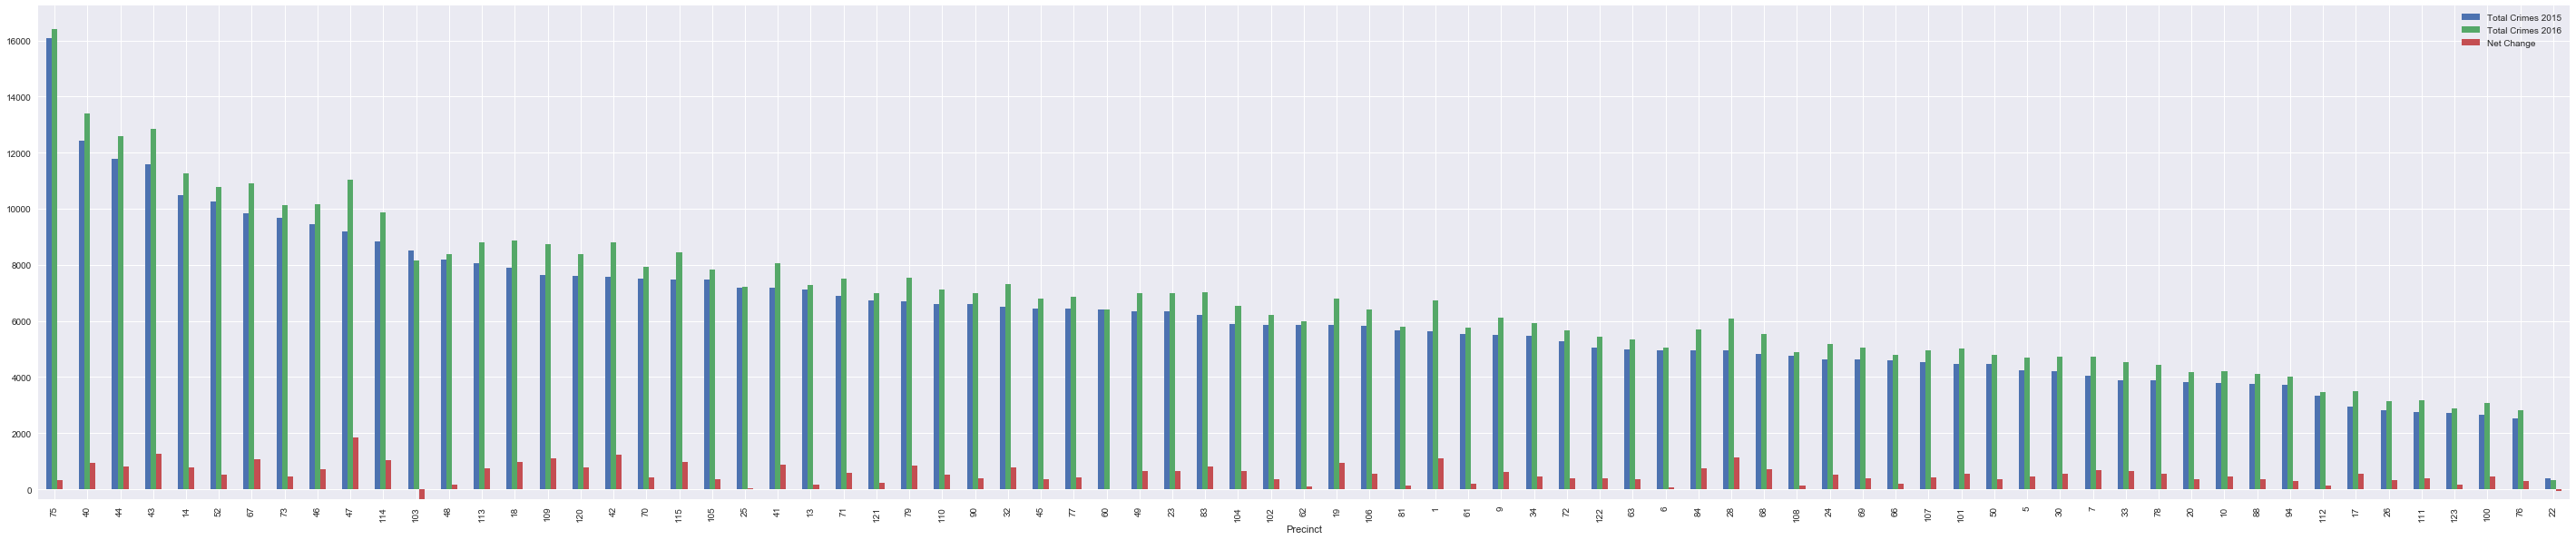

In [16]:
crimeDiff.plot.bar(fontsize=10,figsize= (50, 10))

## Uniting the Data:

Trying to unite the data was time consuming, I first had to find which zipcodes had which precincts in them, and then compared how many noise complaints and criminal charges changed over the two year periods and finally decide what is the quietest and safest neighborhood.

In [17]:
pcntZipTot = pd.read_csv('https://raw.githubusercontent.com/WilliamJCole/IS362_Final_Project/master/Files/pcntZipTot.csv',sep=',')
pcntZipTot

,Zip Code,Precinct,Noise April 2015,Noise April 2016,Net Change,Total Crimes 2015,Total Crimes 2016,Net Change.1
0,10001,10,545,269,-276,3775,4218,443
1,10002,7,591,685,94,4045,4740,695
2,10003,9,444,441,-3,5507,6120,613
3,10004,1,40,51,11,5644,6733,1089
4,10005,1,205,51,-154,5644,6733,1089
5,10006,1,70,31,-39,5644,6733,1089
6,10007,1,97,54,-43,5644,6733,1089
7,10009,9,568,500,-68,5507,6120,613
8,10010,13,271,277,6,7107,7272,165
9,10011,10,369,411,42,3775,4218,443


In [28]:
pcntZipTot.sort_values(['Total Crimes 2016','Noise April 2016'], ascending=[1,1])

,Zip Code,Precinct,Noise April 2015,Noise April 2016,Net Change,Total Crimes 2015,Total Crimes 2016,Net Change.1
122,11231,76,116,116,0,2521,2824,303
55,10307,123,11,15,4,2713,2874,161
57,10309,123,12,34,22,2713,2874,161
183,11697,100,1,2,1,2643,3090,447
181,11693,100,45,40,-5,2643,3090,447
180,11692,100,44,43,-1,2643,3090,447
182,11694,100,69,52,-17,2643,3090,447
23,10026,26,308,314,6,2831,3148,317
24,10027,26,542,478,-64,2831,3148,317
140,11363,111,7,7,0,2765,3165,400


# Conclusions:

## Geolocation Based Analysis:

So to beter visualize the total complaints in zip codes, I entered the information into tableau:

##### Noise Complaints April 2016:

![alt text](https://github.com/WilliamJCole/IS362_Final_Project/raw/master/Files/Map-2016.png "Noise Complaints 2016")

##### Noise Complaints April 2017:

![alt text](https://github.com/WilliamJCole/IS362_Final_Project/raw/master/Files/Map-2017.png "Noise Complaints 2017")

##### Noise Complaints April Change:

![alt text](https://github.com/WilliamJCole/IS362_Final_Project/raw/master/Files/Map-Diff.png "Noise Complaints Compared")

##### Noise Vs Crime 2015

![alt text](https://github.com/WilliamJCole/IS362_Final_Project/raw/master/Files/noisevcrime2015.png "Noise Vs Crime 2015")

##### Noise Vs Crime 2016

![alt text](https://github.com/WilliamJCole/IS362_Final_Project/raw/master/Files/noisevcrime2016.png "Noise Vs Crime 2016")

##### Net Change Noise Vs Crime 

![alt text](https://github.com/WilliamJCole/IS362_Final_Project/raw/master/Files/netchangenvc.png "Noise Vs Crime Net Change")

## Final Conclusions:

So the data was relatively conflicted, it seemed that noise complaints actually had an inverse relation to criminality of the zip code. 

I would choose the 10307 zip code because the total number of crimes and noise complaints was the lowest in the city.